# ECE531 Computer Vision Assignment 1 
08/10/2020, Abdullah Gul University
### Name: ???Fill this???

* Use or convert to grayscale images to answer the following questions.
* Do not use the preinstalled library functions such as histeq, linearBlend() etc. unless otherwise stated in the question. You can use preliminary libraries such as numpy, loading an image into a matrix etc.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

In [2]:
images_path = os.getcwd() + "\sample_images"

## Question 1
Given that $r$ and $s$ are random variables with relation $s=T(r)$, show that 
$$ \Large p_s(s) = \frac{p_r(r)}{ \left| \frac{dT(r)}{dr}\right| } $$ 

## Answer 1

(Use $\LaTeX$ to answer the question here. Do not upload a separate image for your answer.)

## Question 2 Scalar Contrast and Brightness
Implement a pixel transformation function $g(x)=af(x) + b$ where $a$ and $b$ are scalars. Apply this to "dog" image with $a=1.5$,$b=20$. Pixel range should be in $[0,255]$ range. Do not forget to trim the pixel in $[0, 255]$ range if the pixel value exceeds 255 (saturates).    
Show the output image.

## Answer 2

Image height is 200
Image weigt is 200


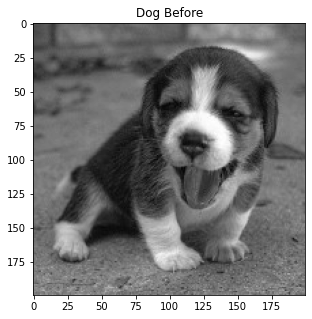

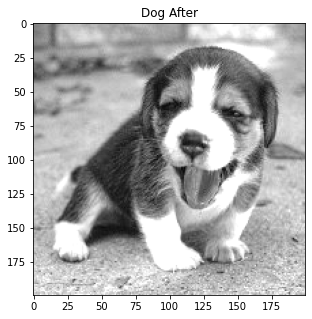

In [3]:
a=1.5
b=20
# Read image in gray scale
dog_img = cv.imread(images_path + "\dog.jpg", cv.IMREAD_GRAYSCALE)

#Set figure size
rcParams["figure.figsize"] = 5.0, 5.0

plt.figure()
plt.title("Dog Before")
plt.imshow(dog_img, cmap="gray")

#Define height and width of image
h, w= dog_img.shape

print(f"Image height is {h}")
print(f"Image weigt is {w}")

#Implementation of function
#Takes each image, put it to function
for i in range(0,h):
    for j in range(0,w):
        result = a*(dog_img[i][j])+b
        if result > 255:
            dog_img[i][j] = 255
        else:
            dog_img[i][j]=result
            
plt.figure()
plt.title("Dog After")
plt.imshow(dog_img, cmap="gray")

## Question 3 Variable Contrast and Brightness
Implement a pixel transformation function $g(x)=a(x)f(x) + b(x)$ where $a$ and $b$ are functions of $x$. Apply this to "dog" image to get a vignetting effect. The strength percentage of vignetting effect will be determined by a variable v. v=100 means full vignetting (black image), v=0 means no vignetting. Pixel range should be in $[0,255]$ range. Do not forget to trim the pixel in $[0, 255]$ range if the pixel value exceeds 255 (saturates). Apply it to cat image.    
Show the output image.

## Answer 3

Image height is 200
Image weigt is 200
(200, 1)
(200, 1)


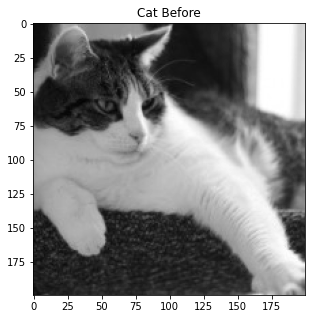

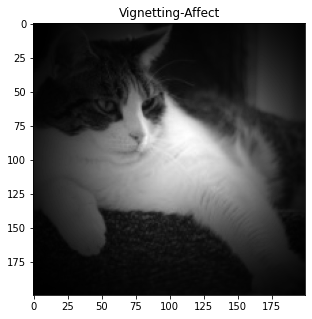

In [4]:
V=50

# Read image in gray scale
cat_img = cv.imread(images_path + "\cat.jpg", cv.IMREAD_GRAYSCALE)

#Set figure size
rcParams["figure.figsize"] = 5.0, 5.0

plt.figure()
plt.title("Cat Before")
plt.imshow(cat_img, cmap="gray")

#Define height and width of image
rows, cols= dog_img.shape

print(f"Image height is {cols}")
print(f"Image weigt is {rows}")

kernel_x = cv.getGaussianKernel(cols,V)
kernel_y = cv.getGaussianKernel(rows,V)

print(kernel_x.shape)
print(kernel_y.shape)
# rows x cols
kernel = kernel_y * kernel_x.T

kernel = kernel/np.linalg.norm(kernel)
mask = 255*kernel

output = np.copy(cat_img) * mask 

plt.figure()
plt.title("Vignetting-Affect")
plt.imshow(output, cmap="gray")


## Question 4 Global Histogram Equalization
Implement a global histogram equalization function with 255 bins. (do not use any histogram equalization libraries. Implement it on your own. That is, count the pixels etc.). Apply it to village picture.   
Show the output image.

## Answer 4

Shape of image (683, 1024)


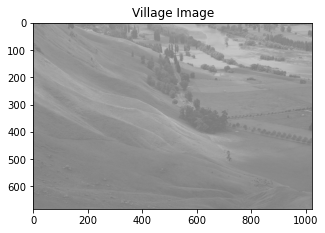

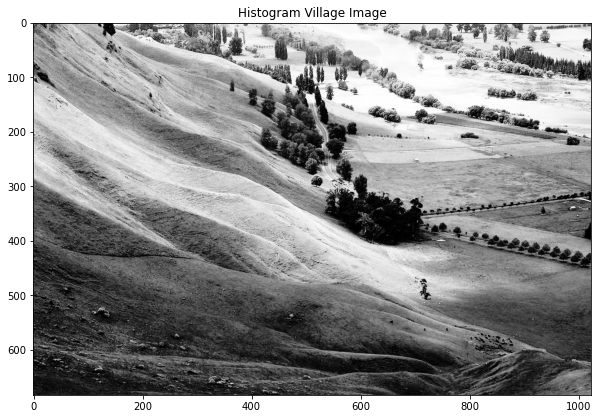

In [5]:
def global_hist_equ(gray_img):
    img_array = np.asarray(gray_img)
    ############
    ###STEP-1### --> Normalized cumulative histogram
    ############
    
    #Calculating histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    #Normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    #Normalized cumulative histogram
    chistogram_array = np.cumsum(histogram_array)
    
    ############
    ###STEP-2### --> Pixel Mapping
    ############
    
    transform_map = np.floor(255*chistogram_array).astype(np.uint8)
    
    ############
    ###STEP-3### --> Transformation
    ############
    
    #Flatten img array into 1D list
    img_list = list(img_array.flatten())
    
    #Transform pixel value to equalize
    output_list = [transform_map[i] for i in img_list]
    
    #Reshape and Output array
    output = np.reshape(np.asarray(output_list), img_array.shape)
    
    return output

village = cv.imread(images_path + "\\village.jpg")
village_gray = cv.cvtColor(village, cv.COLOR_BGR2GRAY)

print(f"Shape of image {village_gray.shape}")

#Define size of plot
rcParams["figure.figsize"] = 5.0, 5.0

#Plot Image
plt.figure()
plt.title("Village Image")
plt.imshow(village, cmap="gray")

#Calling function here
village_gray = global_hist_equ(village_gray)

rcParams["figure.figsize"] = 10.0, 10.0

plt.figure()
plt.title("Histogram Village Image")
plt.imshow(village_gray, cmap="gray")


## Question 5 Local Histogram Equalization
Implement a **local** histogram equalization function with 255 bins and variable window size **w**. For example, if w=10, apply it to 10x10 regions.  (do not use any histogram equalization libraries. Implement it on your own. That is, count the pixels etc.). Apply it to village picture.   
Show the output image.

## Answer 5

## Question 6 CLAHE
In this part, you can use the preinstalled libraries.    
Take a photo of your room. Make sure that the photo contains both dark and bright parts at the same time, such as inside of room and outside of the window.    
a) Show the room photo   
b) Plot histogram and cumulative histogram of the photo.   
c) Apply CLAHE to your room image and show the result.  (do not forget to commit your room photo to github.)

## Answer 6 